In [171]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MiniBatchKMeans
print('Imports Successful.')

Imports Successful.


In [ ]:
    
def show_image(arr):
    plt.imshow(arr, 'gray')
    plt.show()
    

In [ ]:
def mask_skin(frame, visualize_steps= False):
    converted2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    skinMask = cv2.addWeighted(skinMask,0.5,skinMask,0.5,0.0)
    skinMask = cv2.medianBlur(skinMask, 5)
    
    skin = cv2.bitwise_and(converted2, converted2, mask = skinMask)
    
    if visualize_steps:
        show_image(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        show_image(converted)
        show_image(converted2)
        show_image(skinMask)
    
    return skin

In [274]:
def process_image(path, visualize_steps= False):
    img_array = cv2.imread(path)
    frame = cv2.resize(img_array, (128, 128))
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    skin = mask_skin(frame, visualize_steps)
    
    edges = cv2.Canny(skin,60,60)
    
    if visualize_steps:
        print("path:", path)
        print("shape:", img_array.shape)
        show_image(skin)
        show_image(edges)
            
    cv2.destroyAllWindows()
    return edges

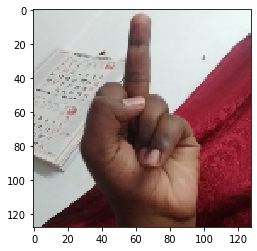

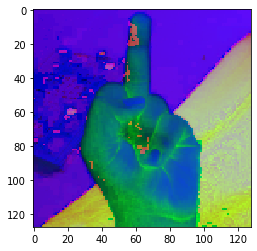

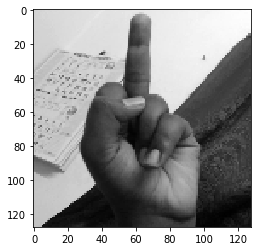

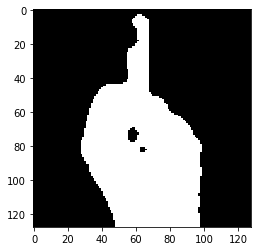

path: C:\Users\jyoth\OneDrive\Pictures\Camera Roll\mid.jpg
shape: (789, 701, 3)


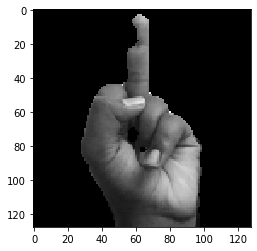

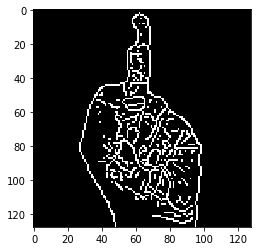

(128, 128)


In [264]:
p = r'C:\Users\jyoth\OneDrive\Pictures\Camera Roll\mid.jpg'
image = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
edges = process_image(p, True)
print(edges.shape)

In [ ]:
def process_image_orb(path, visualize_steps= False):
    img_array = cv2.imread(path)
    frame = cv2.resize(img_array, (128, 128))
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    skin = mask_skin(frame, visualize_steps)
    
    edges = cv2.Canny(skin,60,60)
    
    img3 = cv2.resize(edges,(256,256))
    
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(img3,None)
    
    #print(len(des2))
    keypoints = cv2.drawKeypoints(img3,kp,None,color=(0,255,0), flags=0)
    
    if visualize_steps:
        print("path:", path)
        print("shape:", img_array.shape)
        show_image(skin)
        show_image(edges)
        show_image(keypoints)
            
    cv2.destroyAllWindows()
    return des
    

In [287]:
def prepare_dataset():
    DATA_DIR = 'D:\Jupyter Notebook Files\HandSignRecognition\data'
    CATEGORIES = list(map(chr, range(ord('A'), ord('Z'))))
    CATEGORIES.pop(9)

    image_des = []
    Y = []
    n_out = len(CATEGORIES)
    print('Number of categories:', n_out)
    print('Categories:', CATEGORIES)

    c = 0
    
    for category in CATEGORIES:
        path_to_cat = os.path.join(DATA_DIR, category)
        for img in os.listdir(path_to_cat):
            path = os.path.join(path_to_cat, img)
            edges = process_image(path)
            image_des.append(edges)
            Y.append(category)


    return image_des, Y, CATEGORIES

    
descriptors, Y, CATEGORIES = prepare_dataset()

Number of categories: 24
Categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


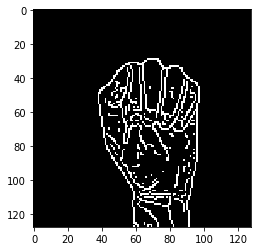

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [309]:
show_image(descriptors[10])
print(descriptors[10])

In [ ]:
def get_shuffled_indices(length):
    np.random.seed(1)
    indices = np.arange(length)
    np.random.shuffle(indices)
    return indices

print(get_shuffled_indices(len(image_des)))

In [ ]:
def split_dataset(descriptors, indices):
    X_train = np.array([[]])
    Y_train = np.array([])
    X_test = np.array([])    
    Y_test = np.array([])    
    X_dev = np.array([])        
    Y_dev = np.array([])    
    
    c = 0
    
    print("Preparing training set.")
    for index in train_indices:
        X_train = np.append(X_train, [descriptors[index]])
        Y_train = np.append(Y_train, Y[index]) 
        c += 1
        if c > 10:
            break
        
        
    print("Preparing testing set.")
    for index in test_indices:
        break
        X_test = np.append(X_test, [descriptors[index]])
        Y_test = np.append(Y_test, Y[index]) 
        
    print("Preparing dev set.")
    for index in dev_indices:
        break
        X_dev = np.append(X_dev, [descriptors[index]])
        Y_dev = np.append(Y_dev, Y[index])        
        
    print("Finished loading data.")

In [307]:
def load_data(test_fraction=0.1, dev_fraction=0):
    
    print("Preparing dataset.")
    descriptors, Y, CATEGORIES = prepare_dataset()
    l = len(descriptors)
    
    print("Shuffling indices.")
    indices = get_shuffled_indices(l)
    
    print("Spliting indices.")
    train_indices, test_indices, dev_indices = split_indices(indices, test_fraction, dev_fraction)
    
    print("Preparing training set.")
    X_train = np.take(descriptors, train_indices, axis=0)
    Y_train = np.take(Y, train_indices)
        
    print("Preparing testing set.")
    X_test = np.take(descriptors, test_indices, axis=0)
    Y_test = np.take(Y, test_indices)
        
    print("Preparing dev set.")
    X_dev = np.take(descriptors, dev_indices, axis=0)
    Y_dev = np.take(Y, dev_indices)
        
    print("Finished loading data.")

    return X_train, Y_train, X_test, Y_test, X_dev, Y_dev

In [ ]:
def split_indices(indices, test_fraction=0.2, dev_fraction=0, verbose= False):

    l = len(indices)

    x = int(np.floor((test_fraction + dev_fraction) * l))
    l_x = l - x
    y = int(np.floor(test_fraction * l))
    l_y = l_x + y
    z = int(np.floor(dev_fraction * l))

    train_indices = indices[ : l_x]
    test_indices = indices[l_x : l_y]
    dev_indices = indices[l_y : ]

    if verbose:
        print("x:", x)
        print("y:", y)
        print("z:", z)
        print("indices: ", indices)
        print("train:", train_indices)
        print("test:", test_indices)
        print("dev:", dev_indices)

        
    return train_indices, test_indices, dev_indices

In [212]:
indices = np.array([1,2,3,4,5,6,7,8,9,0])
split_indices(indices, 0.3, 0.4, True)

x: 7
y: 3
z: 4
indices:  [1 2 3 4 5 6 7 8 9 0]
train: [1 2 3]
test: [4 5 6]
dev: [7 8 9 0]


(array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9, 0]))

In [305]:
xt = np.take(descriptors, indices, axis=0)
print(indices)
print(descriptors[1].shape)
print(xt.shape)

[1 2 3 4 5 6 7 8 9 0]
(128, 128)
(10, 128, 128)


In [310]:
X_train, Y_train, X_test, Y_test, X_dev, Y_dev = load_data()

Preparing dataset.
Number of categories: 24
Categories: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
Shuffling indices.
Spliting indices.
Preparing training set.
Preparing testing set.
Preparing dev set.
Finished loading data.


In [327]:
m = len(X_train)

print("Length of Training set:", m)
print("Length of Test set:", len(X_test))
print("Length of Dev set:", len(X_dev))
print()
print("Shape of trainging set:", X_train.shape)

Length of Training set: 4475
Length of Test set: 497
Length of Dev set: 0

Shape of trainging set: (4475, 128, 128)


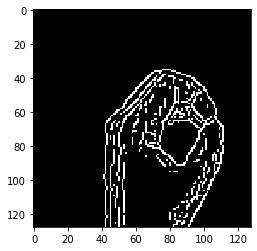

O


In [331]:
index = 8
show_image(X_train[index])
print(Y_train[index])

In [329]:
data = np.array([X_train, Y_train, X_test, Y_test, X_dev, Y_dev])
np.save('dataset', data)

In [330]:
X_train, Y_train, X_test, Y_test, X_dev, Y_dev = np.load('dataset.npy', allow_pickle=True)

In [273]:
X_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

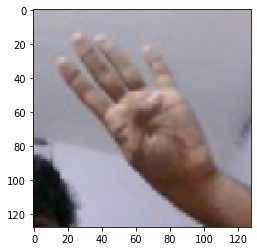

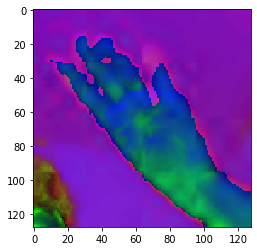

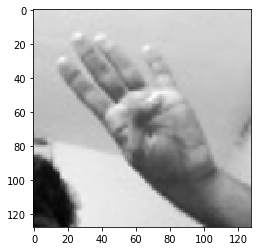

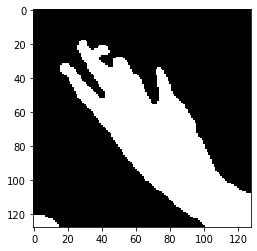

path: C:\Users\jyoth\OneDrive\Pictures\Camera Roll\four.jpg
shape: (64, 64, 3)


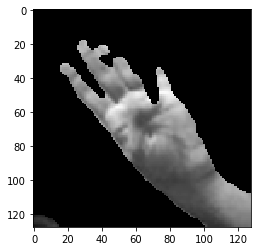

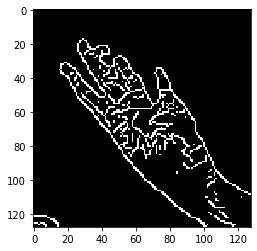

NameError: name 'keypoints' is not defined

In [230]:
p = r'C:\Users\jyoth\OneDrive\Pictures\Camera Roll\four.jpg'
image = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
des = process_image(p, True)
print(des)